<a href="https://colab.research.google.com/github/amruthakm98/Sudoku-reader-and-solver/blob/master/Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

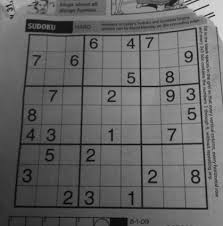

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img=cv2.imread('img2sud.jfif',0)
cv2_imshow(img)

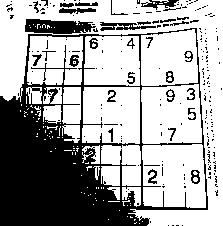

In [0]:
ret,thresh=cv2.threshold(img,90,255,cv2.THRESH_BINARY)
# plt.imshow(thresh)
# plt.show()
cv2_imshow(thresh)

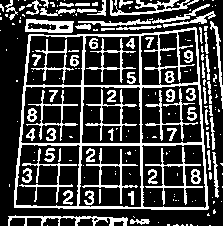

In [0]:
import numpy as np
proc = cv2.GaussianBlur(img.copy(), (3,3),0)
proc3 = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
proc3=cv2.bitwise_not(proc3, proc3)
# kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]])
# kernel=np.array(kernel,dtype=np.uint8)
# proc2=np.array(proc3, dtype=np.uint8)
# proc3=cv2.dilate(proc2,kernel)
cv2_imshow(proc3)

[29. 34.]
[196.  28.]
[207. 209.]
[ 14. 207.]


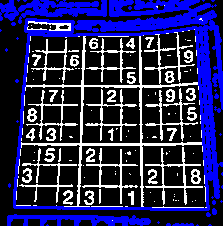

In [0]:
import operator
new_img, ext_contours, hier = cv2.findContours(proc3.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(ext_contours, key=cv2.contourArea, reverse=True)
rect=contours[0]

processed = cv2.cvtColor(proc3, cv2.COLOR_GRAY2RGB)
external_only = cv2.drawContours(processed.copy(), ext_contours, -1, (255,0,0), 2)


bottom_right, new_img = max(enumerate([pt[0][0] + pt[0][1] for pt in rect]), key=operator.itemgetter(1))
top_left,new_img = min(enumerate([pt[0][0] + pt[0][1] for pt in rect]), key=operator.itemgetter(1))
bottom_left,new_img = min(enumerate([pt[0][0] - pt[0][1] for pt in rect]), key=operator.itemgetter(1))
top_right, new_img= max(enumerate([pt[0][0] - pt[0][1] for pt in rect]), key=operator.itemgetter(1))
coord=np.array([rect[top_left][0],rect[top_right][0],rect[bottom_right][0],rect[bottom_left][0]],dtype='float32')
for i in coord:
  print(i)
cv2_imshow(external_only)


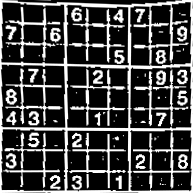

In [0]:
def distance(p1,p2):
  x=p1[0]-p2[0]
  y=p1[1]-p2[0]
  return np.sqrt((x**2)+(y**2))

side=max([distance(rect[top_left][0],rect[bottom_left][0]),
          distance(rect[bottom_left][0],rect[bottom_right][0]),
          distance(rect[bottom_right][0],rect[top_right][0]),
          distance(rect[top_right][0],rect[top_left][0])])
# print(side)

sq=np.array([[0,0],[side-1,0],[side-1,side-1],[0,side-1]],dtype='float32')

new=cv2.getPerspectiveTransform(coord,sq)
warped=cv2.warpPerspective(proc3,new,(int(side),int(side)))
cv2_imshow(warped)


21.444444444444443
0.0 0.0 21.444444444444443 21.444444444444443


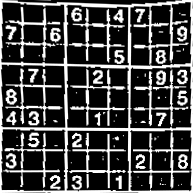

In [0]:
squares=[]
pt=side/9
print(pt)

for i in range(9):
  for j in range(9):
    p1=(i*pt,j*pt)
    p2=((i+1)*pt,(j+1)*pt)
    # print(p1)
    # print(p2)
    squares.append((p1,p2))
print(squares[0][0][0],squares[0][0][1],squares[0][1][0],squares[0][1][1])
cv2_imshow(warped)
kernel = np.ones((2,2), np.uint8) 
  
# The first parameter is the original image, 
# kernel is the matrix with which image is  
# convolved and third parameter is the number  
# of iterations, which will determine how much  
# you want to erode/dilate a given image.  
# warped = cv2.erode(warped, kernel, iterations=1) 
# #  = cv2.dilate(warped, kernel, iterations=1) 
# cv2_imshow(warped)


In [0]:
digits=[]
for sq in squares:
  im=warped[int(sq[0][0]):int(sq[1][0]),int(sq[0][1]):int(sq[1][1])]
  height, width = im.shape[0:2]
  startRow = int(height*.02)
  startCol = int(width*.02)
  endRow = int(height*.98)
  endCol = int(width*.98)
  croppedImage = im[startRow:endRow, startCol:endCol]
  digits.append(croppedImage)
itr=1
for i in digits:
  cv2.imwrite("he"+str(itr)+".jpg",i)
  itr=itr+1
  cv2_imshow(i)

In [0]:
arr=[]
for i in range(1,82):
  img=cv2.imread("he"+str(i)+".jpg")
  n_white_pix = np.sum(img == 255)
  print('Number of white pixels:', n_white_pix)
  if(n_white_pix>100):
    arr.append(1)
  else:
    arr.append(0)  
  print(i)
print(arr)


Number of white pixels: 87
1
Number of white pixels: 63
2
Number of white pixels: 69
3
Number of white pixels: 189
4
Number of white pixels: 138
5
Number of white pixels: 159
6
Number of white pixels: 129
7
Number of white pixels: 66
8
Number of white pixels: 114
9
Number of white pixels: 153
10
Number of white pixels: 72
11
Number of white pixels: 162
12
Number of white pixels: 108
13
Number of white pixels: 99
14
Number of white pixels: 87
15
Number of white pixels: 117
16
Number of white pixels: 48
17
Number of white pixels: 165
18
Number of white pixels: 60
19
Number of white pixels: 81
20
Number of white pixels: 45
21
Number of white pixels: 105
22
Number of white pixels: 105
23
Number of white pixels: 141
24
Number of white pixels: 153
25
Number of white pixels: 126
26
Number of white pixels: 90
27
Number of white pixels: 60
28
Number of white pixels: 135
29
Number of white pixels: 57
30
Number of white pixels: 111
31
Number of white pixels: 156
32
Number of white pixels: 99
33
N

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) 
n_train = mnist.train.num_examples  # 55,000
n_validation = mnist.validation.num_examples  # 5000
n_test = mnist.test.num_examples 
n_input = 784  # input layer (28x28 pixels)
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 3rd hidden layer
n_output = 10 
learning_rate = 1e-4
n_iterations = 1000
batch_size = 128
dropout = 0.5
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32)
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=Y, logits=output_layer
        ))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        X: batch_x, Y: batch_y, keep_prob: dropout
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0}
            )
        print(
            "Iteration",
            str(i),
            "\t| Loss =",
            str(minibatch_loss),
            "\t| Accuracy =",
            str(minibatch_accuracy)
            )

Iteration 0 	| Loss = 3.4213223 	| Accuracy = 0.125
Iteration 100 	| Loss = 0.39876533 	| Accuracy = 0.875
Iteration 200 	| Loss = 0.3939092 	| Accuracy = 0.875
Iteration 300 	| Loss = 0.23082297 	| Accuracy = 0.9609375
Iteration 400 	| Loss = 0.34592462 	| Accuracy = 0.8828125
Iteration 500 	| Loss = 0.23592342 	| Accuracy = 0.921875
Iteration 600 	| Loss = 0.22768354 	| Accuracy = 0.9296875
Iteration 700 	| Loss = 0.3961953 	| Accuracy = 0.875
Iteration 800 	| Loss = 0.47078997 	| Accuracy = 0.859375
Iteration 900 	| Loss = 0.21839744 	| Accuracy = 0.921875


In [0]:
import numpy as np
from PIL import Image
for i in range(1,82):
  if arr[i]==1:
    img=cv2.imread("he"+str(i)+".jpg",0)
    img=cv2.bitwise_not(img)
    _, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
    sizes = stats[1:, -1] #get CC_STAT_AREA component
    img2 = np.zeros((labels.shape), np.uint8)
    for i in range(0, nlabels - 1):
        if sizes[i] >= 50:   #filter small dotted regions
            img2[labels == i + 1] = 255

  img = cv2.bitwise_not(img2)
    resized_image = cv2.resize(img, (28, 28))
    cv2_imshow(resized_image)
    cv2.imwrite('resized_image.jpg',resized_image)
    print(resized_image.shape)
    test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})
    print("\nAccuracy on test set:", test_accuracy)
    img = np.invert(Image.open("resized_image.jpg").convert('L')).ravel()
    prediction = sess.run(tf.argmax(output_layer, 1), feed_dict={X: [img]})
    print ("Prediction for test image:", np.squeeze(prediction))
  else:
    print(0)

0
0
0


(28, 28)

Accuracy on test set: 0.9191
Prediction for test image: 2
0
0
0
0


(28, 28)

Accuracy on test set: 0.9191
Prediction for test image: 5
0
0
0
0
0
0
0
0


(28, 28)

Accuracy on test set: 0.9191
Prediction for test image: 5
0
0
0
0
0


(28, 28)

Accuracy on test set: 0.9191
Prediction for test image: 5
0
0
0
0
0
0
0
0
0
0
0


(28, 28)

Accuracy on test set: 0.9191
Prediction for test image: 5
0
0
0
0
0
0
0
0


(28, 28)

Accuracy on test set: 0.9191
Prediction for test image: 5
0
0
0
0
0
0
0
0


(28, 28)

Accuracy on test set: 0.9191
Prediction for test image: 2
0
0


(28, 28)

Accuracy on test set: 0.9191
Prediction for test image: 3
0
0


(28, 28)

Accuracy on test set: 0.9191
Prediction for test image: 3
0
0


(28, 28)

Accuracy on test set: 0.9191
Prediction for test image: 5
0
0
0
0
0
0
0
0


(28, 28)

Accuracy on test set: 0.9191
Prediction for test image: 5
0
0
0
0
0
0
0
0


IndexError: ignored

In [0]:
import cv2 
import numpy as np 
  
# Read the main image 
for i in range(1,82):

  img_rgb = cv2.imread("he"+str(i)+".jpg")
  
  # Convert it to grayscale 
  img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 
    
  # Read the template 
  template = cv2.imread('he46.jpg',0) 
    
  # Store width and height of template in w and h 
  w, h = template.shape[::-1] 
  img_gray=cv2.resize(img_gray,(w,h))
  # Perform match operations. 
  res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED) 
  print(res)
    
  # Specify a threshold 
  threshold = 0.6
    
  # Store the coordinates of matched area in a numpy array 
  loc = np.where( res >= threshold) 
  if np.any(res>=threshold):
    cv2_imshow(img_gray)
    print("Yes")
  else:
    cv2_imshow(img_gray)
    print("No")

[[0.3321164]]


No
[[0.14203458]]


No
[[-0.04745222]]


No
[[0.20546126]]


No
[[0.05167383]]


No
[[0.2339113]]


No
[[0.2852979]]


No
[[0.03293773]]


No
[[0.13427936]]


No
[[0.45868176]]


No
[[0.14056335]]


No
[[0.11417191]]


No
[[0.30684036]]


No
[[0.07846559]]


No
[[0.40525866]]


No
[[0.3297203]]


No
[[0.1324314]]


No
[[0.4844466]]


No
[[0.39413533]]


No
[[0.2003049]]


No
[[0.12550247]]


No
[[0.16493239]]


No
[[0.0022949]]


No
[[0.41566747]]


No
[[0.30326]]


No
[[0.34780085]]


No
[[0.13530135]]


No
[[0.5330962]]


No
[[0.49441957]]


No
[[0.25146738]]


No
[[0.2868083]]


No
[[0.09799951]]


No
[[0.07402582]]


No
[[0.1293171]]


No
[[0.346895]]


No
[[0.2646979]]


No
[[0.60457605]]


Yes
[[0.41203484]]


No
[[0.16637039]]


No
[[0.23766269]]


No
[[0.06099544]]


No
[[0.17458546]]


No
[[0.19874409]]


No
[[0.24453034]]


No
[[0.3252561]]


No
[[0.9999999]]


Yes
[[0.41773105]]


No
[[0.22006446]]


No
[[0.16134301]]


No
[[0.27708635]]


No
[[0.23205934]]


No
[[0.3360027]]


No
[[0.347946]]


No
[[0.20758854]]


No
[[0.45468438]]


No
[[0.45130607]]


No
[[0.14282589]]


No
[[0.2890569]]


No
[[0.10144322]]


No
[[0.24165687]]


No
[[0.32018918]]


No
[[0.21908669]]


No
[[0.28362587]]


No
[[0.57310814]]


No
[[0.5593797]]


No
[[0.30465177]]


No
[[0.34363842]]


No
[[0.21386553]]


No
[[0.44855955]]


No
[[0.51150894]]


No
[[0.493304]]


No
[[0.55933046]]


No
[[0.29991046]]


No
[[0.30198604]]


No
[[0.26359883]]


No
[[0.34774345]]


No
[[-0.00747553]]


No
[[0.5046428]]


No
[[0.26977605]]


No
[[0.3288125]]


No
[[0.2082011]]


No


In [0]:
! [ ! -z "$COLAB_GPU" ] && pip install torch scikit-learn==0.20.* skorch

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

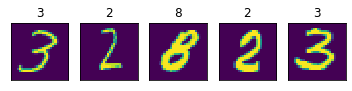

In [0]:
mnist = fetch_openml('mnist_784', cache=False)
mnist.data.shape
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X /= 255.0
X.min(), X.max()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
assert(X_train.shape[0] + X_test.shape[0] == mnist.data.shape[0])
X_train.shape, y_train.shape
def plot_example(X, y):
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)
plot_example(X_train, y_train)


In [0]:
import torch
from torch import nn
import torch.nn.functional as F
device = 'cuda' if torch.cuda.is_available() else 'cpu'
mnist_dim = X.shape[1]
hidden_dim = int(mnist_dim/8)
output_dim = len(np.unique(mnist.target))
mnist_dim, hidden_dim, output_dim
class ClassifierModule(nn.Module):
    def __init__(
            self,
            input_dim=mnist_dim,
            hidden_dim=hidden_dim,
            output_dim=output_dim,
            dropout=0.5,
    ):
        super(ClassifierModule, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X


In [0]:
from skorch import NeuralNetClassifier
torch.manual_seed(0)

net = NeuralNetClassifier(
    ClassifierModule,
    max_epochs=20,
    lr=0.1,
    device=device,
)
net.fit(X_train, y_train);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8309       0.8865        0.4049  1.5238


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:937: FutureWarning: Passing all_or_any to check_is_fitted is deprecated and will be removed in 0.23. The any_or_all argument is ignored.
  "argument is ignored.", FutureWarning)


      2        0.4338       0.9127        0.3100  1.5687
      3        0.3617       0.9234        0.2653  1.5035
      4        0.3249       0.9310        0.2383  1.4696
      5        0.2949       0.9368        0.2147  1.5735
      6        0.2732       0.9412        0.1998  1.5725
      7        0.2621       0.9448        0.1894  1.4829
      8        0.2442       0.9470        0.1794  1.5777
      9        0.2347       0.9502        0.1742  1.5432
     10        0.2249       0.9515        0.1647  1.6084
     11        0.2157       0.9528        0.1610  1.6065
     12        0.2109       0.9561        0.1497  1.5602
     13        0.2011       0.9566        0.1462  1.5753
     14        0.1990       0.9577        0.1417  1.5940
     15        0.1919       0.9580        0.1391  1.5037
     16        0.1908       0.9593        0.1371  1.5736
     17        0.1803       0.9607        0.1316  1.5285
     18        0.1790       0.9615        0.1299  1.5084
     19        0.1758       0.9

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:937: FutureWarning: Passing all_or_any to check_is_fitted is deprecated and will be removed in 0.23. The any_or_all argument is ignored.
  "argument is ignored.", FutureWarning)


[8 4 8 ... 5 9 2]


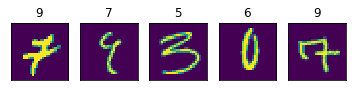

In [0]:
from sklearn.metrics import accuracy_score
y_pred = net.predict(X_test)
print(y_pred)
accuracy_score(y_test, y_pred)
error_mask = y_pred != y_test
plot_example(X_test[error_mask], y_pred[error_mask])

X_test[error_mask].shape
from matplotlib.image import imread

In [0]:
arr=[]
yp2=[]
for i in range(1,82):
  img=cv2.imread('he'+str(i)+'.jpg',0)
  img=cv2.bitwise_not(img)
  _, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
  nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
  sizes = stats[1:, -1] #get CC_STAT_AREA component
  img2 = np.zeros((labels.shape), np.uint8)
  for i in range(0, nlabels - 1):
      if sizes[i] >= 50:   #filter small dotted regions
          img2[labels == i + 1] = 255

  img = cv2.bitwise_not(img2)

  # cv2.imwrite('res.png', res)
  # cv2_imshow(img)
  im=img
  n_white_pix = np.sum(img == 255)
  # print('Number of white pixels:', n_white_pix)
  img=cv2.resize(img,(28,28))
  img=img.reshape([1,784])
  img = img.astype('float32')
  img/=255.0
  if(n_white_pix>280):
    arr.append(0)
    cv2_imshow(im)
    print('Number of white pixels:', n_white_pix)
  else:
    cv2_imshow(im)
    print('Number of white pixels:', n_white_pix)
    print(net.predict(img))
    # arr.append(1) 
    ar=net.predict(img)
    arr.append(ar)
print(arr)
# print(yp1)

Number of white pixels: 303


Number of white pixels: 350


Number of white pixels: 356


Number of white pixels: 218
[0]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:937: FutureWarning: Passing all_or_any to check_is_fitted is deprecated and will be removed in 0.23. The any_or_all argument is ignored.
  "argument is ignored.", FutureWarning)


Number of white pixels: 344


Number of white pixels: 269
[6]


Number of white pixels: 282


Number of white pixels: 312


Number of white pixels: 315


Number of white pixels: 334


Number of white pixels: 308


Number of white pixels: 270
[5]


Number of white pixels: 335


Number of white pixels: 307


Number of white pixels: 325


Number of white pixels: 369


Number of white pixels: 325


Number of white pixels: 251
[2]


Number of white pixels: 420


Number of white pixels: 339


Number of white pixels: 374


Number of white pixels: 362


Number of white pixels: 359


Number of white pixels: 274
[0]


Number of white pixels: 378


Number of white pixels: 247
[0]


Number of white pixels: 384


Number of white pixels: 348


Number of white pixels: 341


Number of white pixels: 420


Number of white pixels: 297


Number of white pixels: 264
[2]


Number of white pixels: 337


Number of white pixels: 301


Number of white pixels: 311


Number of white pixels: 253
[2]


Number of white pixels: 315


Number of white pixels: 343


Number of white pixels: 361


Number of white pixels: 357


Number of white pixels: 360


Number of white pixels: 325


Number of white pixels: 381


Number of white pixels: 420


Number of white pixels: 354


Number of white pixels: 331


Number of white pixels: 252
[2]


Number of white pixels: 354


Number of white pixels: 348


Number of white pixels: 347


Number of white pixels: 330


Number of white pixels: 420


Number of white pixels: 268
[2]


Number of white pixels: 364


Number of white pixels: 354


Number of white pixels: 330


Number of white pixels: 379


Number of white pixels: 225
[8]


Number of white pixels: 378


Number of white pixels: 360


Number of white pixels: 326


Number of white pixels: 365


Number of white pixels: 377


Number of white pixels: 311


Number of white pixels: 400


Number of white pixels: 360


Number of white pixels: 338


Number of white pixels: 356


Number of white pixels: 341


Number of white pixels: 288


Number of white pixels: 339


Number of white pixels: 273
[5]


Number of white pixels: 346


Number of white pixels: 420


Number of white pixels: 281


Number of white pixels: 251
[8]


Number of white pixels: 441


Number of white pixels: 359


Number of white pixels: 373


Number of white pixels: 351


Number of white pixels: 314
[0, 0, 0, array([0]), 0, array([6]), 0, 0, 0, 0, 0, array([5]), 0, 0, 0, 0, 0, array([2]), 0, 0, 0, 0, 0, array([0]), 0, array([0]), 0, 0, 0, 0, 0, array([2]), 0, 0, 0, array([2]), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, array([2]), 0, 0, 0, 0, 0, array([2]), 0, 0, 0, 0, array([8]), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, array([5]), 0, 0, 0, array([8]), 0, 0, 0, 0, 0]


In [0]:
res=[]
print(len(arr))
for i in range(0,81):
  if arr[i]==0:
    res.append(0)
  else:
    res.append(arr[i][0])
print(res)
result=np.asarray(res)
result=np.reshape(result,(9,9))
print(result)

81
[0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 8, 0, 0, 0, 0, 0]
[[0 0 0 0 0 6 0 0 0]
 [0 0 5 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 2]
 [0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 2 0]
 [0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5]
 [0 0 0 8 0 0 0 0 0]]


In [0]:

# A Utility Function to print the Grid 
def print_grid(arr): 
	for i in range(9): 
		for j in range(9): 
			print (arr[i][j],end=' '), 
		print ('\n') 

		
# Function to Find the entry in the Grid that is still not used 
# Searches the grid to find an entry that is still unassigned. If 
# found, the reference parameters row, col will be set the location 
# that is unassigned, and true is returned. If no unassigned entries 
# remain, false is returned. 
# 'l' is a list variable that has been passed from the solve_sudoku function 
# to keep track of incrementation of Rows and Columns 
def find_empty_location(arr,l): 
	for row in range(9): 
		for col in range(9): 
			if(arr[row][col]==0): 
				l[0]=row 
				l[1]=col 
				return True
	return False

# Returns a boolean which indicates whether any assigned entry 
# in the specified row matches the given number. 
def used_in_row(arr,row,num): 
	for i in range(9): 
		if(arr[row][i] == num): 
			return True
	return False

# Returns a boolean which indicates whether any assigned entry 
# in the specified column matches the given number. 
def used_in_col(arr,col,num): 
	for i in range(9): 
		if(arr[i][col] == num): 
			return True
	return False

# Returns a boolean which indicates whether any assigned entry 
# within the specified 3x3 box matches the given number 
def used_in_box(arr,row,col,num): 
	for i in range(3): 
		for j in range(3): 
			if(arr[i+row][j+col] == num): 
				return True
	return False

# Checks whether it will be legal to assign num to the given row,col 
# Returns a boolean which indicates whether it will be legal to assign 
# num to the given row,col location. 
def check_location_is_safe(arr,row,col,num): 
	
	# Check if 'num' is not already placed in current row, 
	# current column and current 3x3 box 
	return not used_in_row(arr,row,num) and not used_in_col(arr,col,num) and not used_in_box(arr,row - row%3,col - col%3,num) 

# Takes a partially filled-in grid and attempts to assign values to 
# all unassigned locations in such a way to meet the requirements 
# for Sudoku solution (non-duplication across rows, columns, and boxes) 
def solve_sudoku(arr): 
	
	# 'l' is a list variable that keeps the record of row and col in find_empty_location Function	 
	l=[0,0] 
	
	# If there is no unassigned location, we are done	 
	if(not find_empty_location(arr,l)): 
		return True
	
	# Assigning list values to row and col that we got from the above Function 
	row=l[0] 
	col=l[1] 
	
	# consider digits 1 to 9 
	for num in range(1,10): 
		
		# if looks promising 
		if(check_location_is_safe(arr,row,col,num)): 
			
			# make tentative assignment 
			arr[row][col]=num 

			# return, if success, ya! 
			if(solve_sudoku(arr)): 
				return True

			# failure, unmake & try again 
			arr[row][col] = 0
			
	# this triggers backtracking		 
	return False

# Driver main function to test above functions 
if __name__=="__main__": 
	
	# creating a 2D array for the grid 
	grid=[[0 for x in range(9)]for y in range(9)] 
	
	# assigning values to the grid 
	grid=result
	
	# if success print the grid 
	if(solve_sudoku(grid)): 
		print_grid(grid)
	else: 
		print ("No solution exists")
 


No solution exists
